## Data Preparation

In [2]:
# importing files
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Unique values in each column
print(df.nunique())

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


### Data / Feature Details 

We got the dataset details from <b>UCI Machine Learning Repository</b> (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). <br>
Features:
1. age      - age in years
2. sex      - sex (1 = male; 0 = female)
3. cp       - chest pain type
                -- Value 1: typical angina
                -- Value 2: atypical angina
                -- Value 3: non-anginal pain
                -- Value 4: asymptomatic 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
5. chol     - serum cholestoral in mg/dl
6. fbs      - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg  - resting electrocardiographic results
                -- Value 0: normal
                -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach  - maximum heart rate achieved
9. exang    - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope   - the slope of the peak exercise ST segment
                -- Value 1: upsloping
                -- Value 2: flat
                -- Value 3: downsloping 
12. ca      - number of major vessels (0-3) colored by flourosopy
13. thal    - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target  - (the predicted attribute) diagnosis of heart disease (angiographic disease status)
                -- Value 0: < 50% diameter narrowing
                -- Value 1: > 50% diameter narrowing 
 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Missing value or data 

In [8]:
def num_missing(x):
    return sum(x.isnull())

In [9]:
#column wise Missing values counts:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) 

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


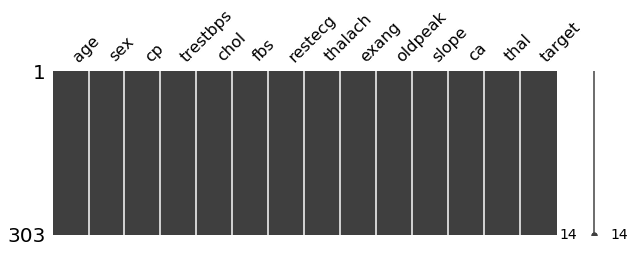

In [10]:
import missingno as msno
msno.matrix(df,figsize=(10,3))

No missing values found

## Exploratory data analysis 

In [11]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [13]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### EDA for Target value

In [14]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

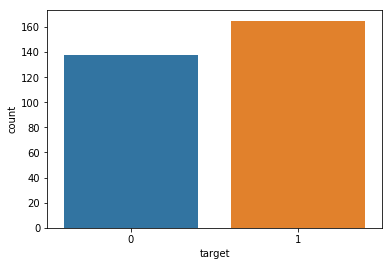

In [15]:
sns.countplot(df['target'])

In [16]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_ord_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

#### EDA for Numeric Features

In [17]:
df[numeric_columns].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


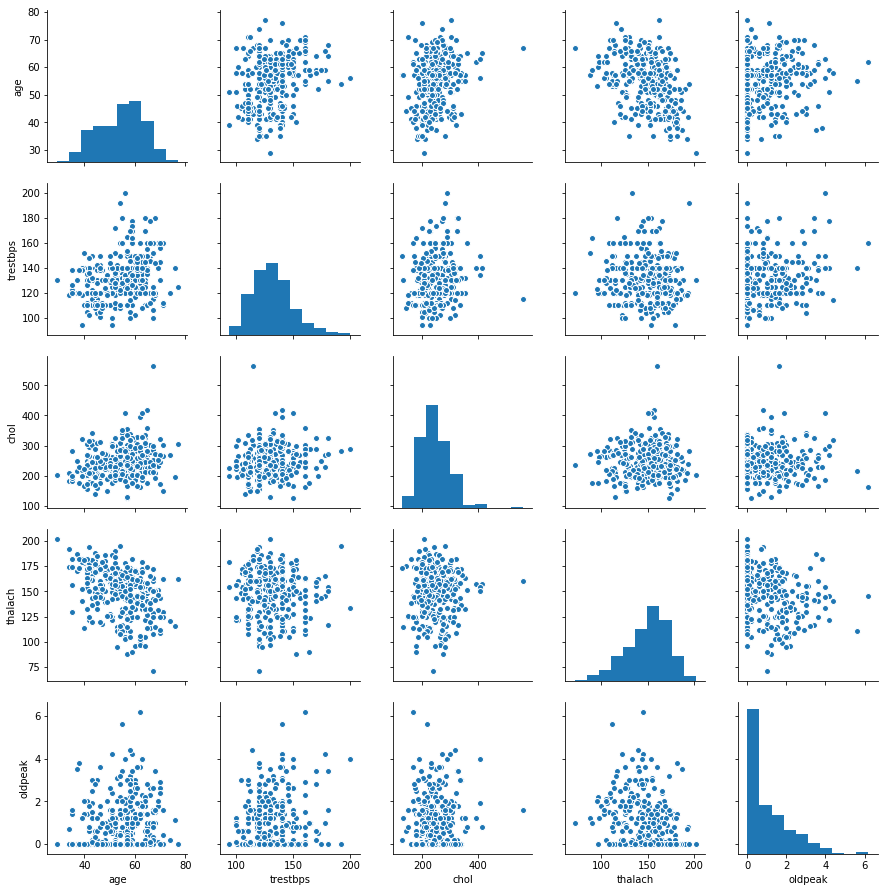

In [18]:
sns.pairplot(df[numeric_columns])
plt.show()

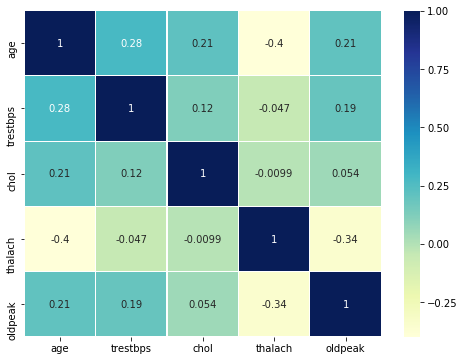

In [19]:
# create a correlation heatmap
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='YlGnBu', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E58754E208>,
      dtype=object)

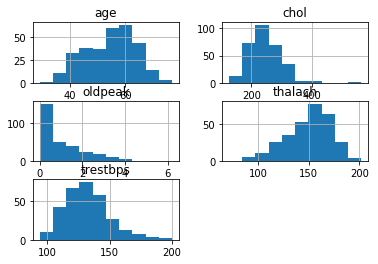

In [20]:
df[numeric_columns].hist()

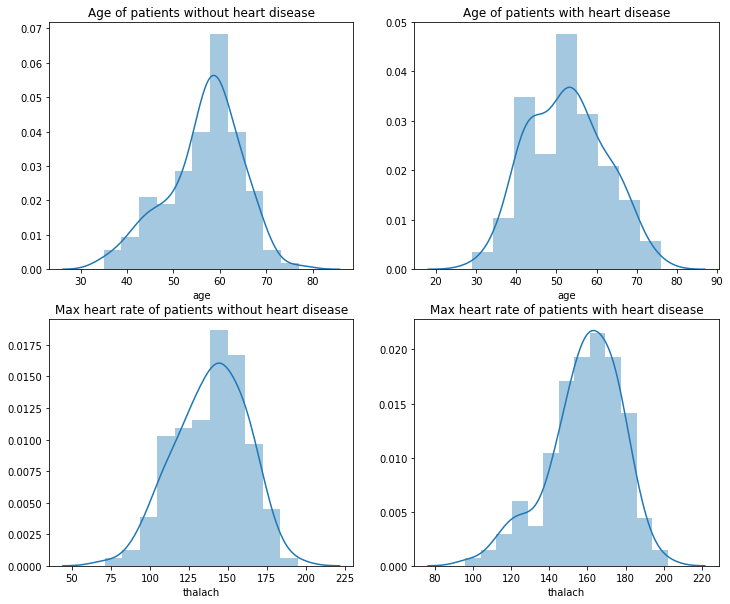

In [21]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Max heart rate of patients with heart disease')
plt.show()

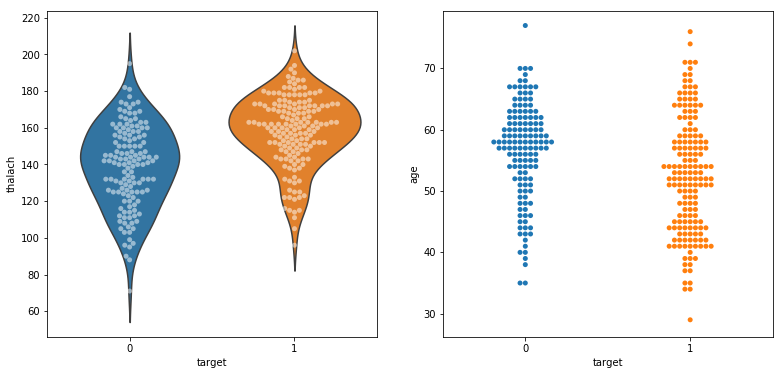

In [22]:
# create swarmplot inside the violinplot
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=df, inner=None)
sns.swarmplot(x='target', y='thalach', data=df, color='w', alpha=0.5)
plt.subplot(122)
sns.swarmplot(x='target', y='age', data=df)
plt.show()

#### EDA for Categorical features

In [23]:
# count ill vs healthy people grouped by sex
df.groupby(['sex','target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64

In [24]:
# average number of diagnosed people grouped by number of blood vessels detected by fluoroscopy
df[['ca','target']].groupby('ca').mean()

,target
ca,
0,0.742857
1,0.323077
2,0.184211
3,0.150000
4,0.800000


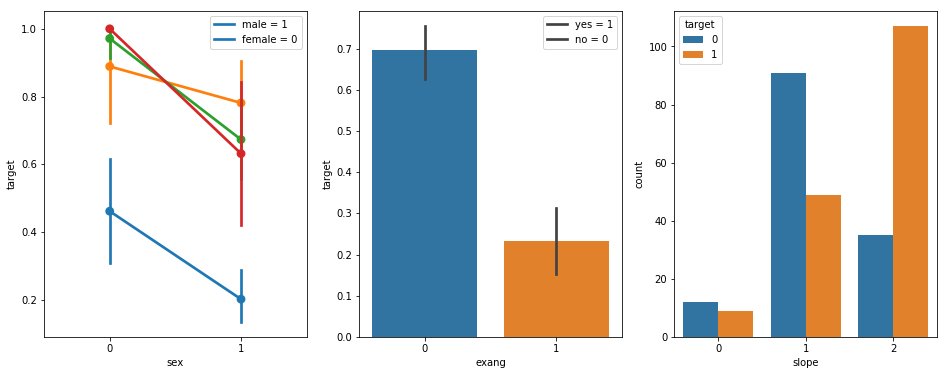

In [25]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=df)
plt.show()

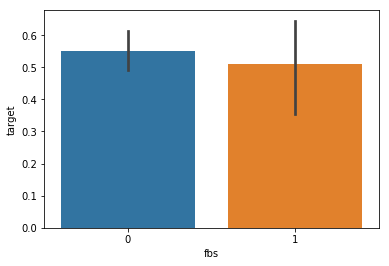

In [26]:
# create a barplot
sns.barplot(x="fbs", y="target", data=df)

## Features Selection & Feature Engineering

In [27]:
# extract the target variable
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


[0.06769578 0.06974837 0.12017303 0.06187242 0.0625851  0.01755859
 0.04376723 0.08634714 0.09975075 0.11100311 0.06849403 0.12781003
 0.06319441]


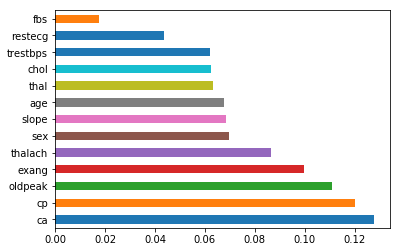

In [30]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

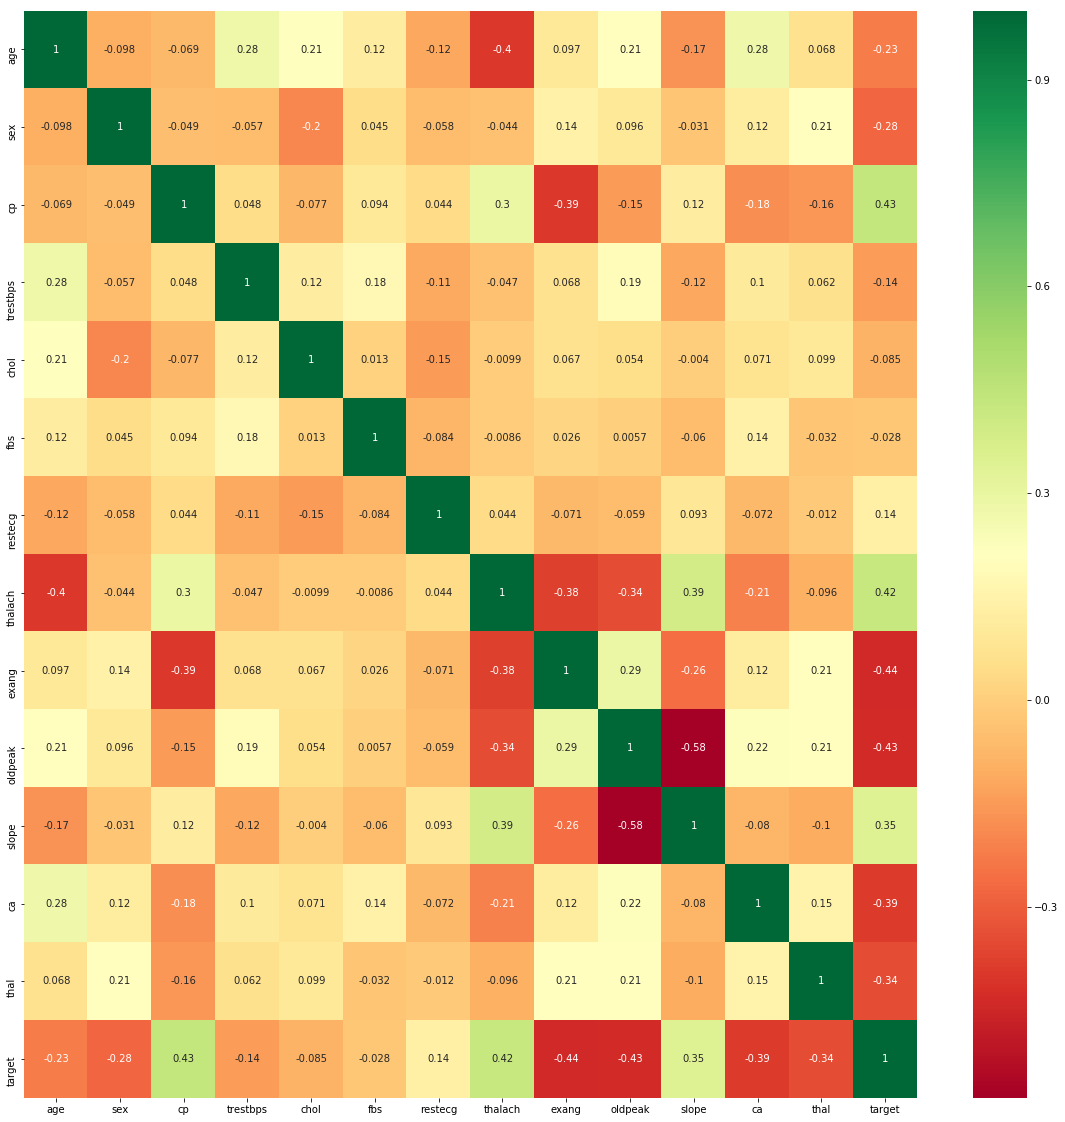

In [31]:
#correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [33]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 1
Selected Features: [False False False False False False False False  True False False False
 False]
Feature Ranking: [12  2  5 10 13 11  8  9  1  7  3  4  6]


In [34]:
mk = list(zip(X.columns.tolist(),fit.ranking_.tolist()))
pd.DataFrame(mk , columns=['Column','rank'])

,Column,rank
0,age,12
1,sex,2
2,cp,5
3,trestbps,10
4,chol,13
5,fbs,11
6,restecg,8
7,thalach,9
8,exang,1
9,oldpeak,7


In [35]:
X = X.drop("fbs",axis=1)

In [36]:
print(X.shape)
print(y.shape)

(303, 12)
(303,)


According to the above anaysis we have droped the fbs column.

## Select Training, test split 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=92019)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 12)
train_set_y shape: (212,)
test_set_x shape: (91, 12)
test_set_y shape: (91,)


## Feature Scaling

In [39]:
# scale feature matrices
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Analysis based on algorithm 

In [40]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [41]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

#### K-Nearest Neighbours (KNN)

In [42]:
# KNN
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

Train accuracy: 86.79%
Test accuracy: 76.92%


In [43]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 76.92%
n_neigbors = 2
Train accuracy: 90.09%
Test accuracy: 76.92%
n_neigbors = 3
Train accuracy: 89.62%
Test accuracy: 81.32%
n_neigbors = 4
Train accuracy: 88.68%
Test accuracy: 76.92%
n_neigbors = 5
Train accuracy: 86.79%
Test accuracy: 76.92%
n_neigbors = 6
Train accuracy: 88.68%
Test accuracy: 76.92%
n_neigbors = 7
Train accuracy: 87.74%
Test accuracy: 81.32%
n_neigbors = 8
Train accuracy: 88.21%
Test accuracy: 80.22%
n_neigbors = 9
Train accuracy: 87.74%
Test accuracy: 81.32%


#### Decision Tree

Train accuracy: 100.00%
Test accuracy: 71.43%


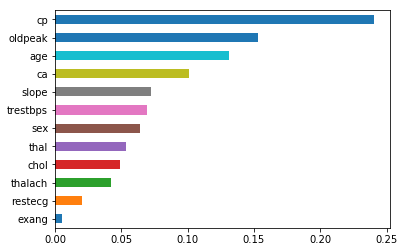

In [44]:
# Decision Tree
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=92019)

# plot feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [45]:
# Check optimal 'max_depth' parameter
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=92019)

max_depth = 1
Train accuracy: 74.53%
Test accuracy: 79.12%
max_depth = 2
Train accuracy: 75.47%
Test accuracy: 80.22%
max_depth = 3
Train accuracy: 85.85%
Test accuracy: 64.84%
max_depth = 4
Train accuracy: 90.09%
Test accuracy: 74.73%
max_depth = 5
Train accuracy: 95.75%
Test accuracy: 70.33%
max_depth = 6
Train accuracy: 98.58%
Test accuracy: 69.23%
max_depth = 7
Train accuracy: 99.53%
Test accuracy: 70.33%


#### Logistic Regression

In [46]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 85.85%
Test accuracy: 82.42%


#### Gaussian Naive Bayes

In [47]:
# Gaussian Naive Bayes
model = train_model(X_train, y_train, X_test, y_test, GaussianNB)

Train accuracy: 84.43%
Test accuracy: 80.22%


#### Support Vector Machines

In [48]:
# Support Vector Machines
model = train_model(X_train, y_train, X_test, y_test, SVC)

Train accuracy: 91.04%
Test accuracy: 82.42%


In [49]:
# tuned SVM
model = train_model(X_train, y_train, X_test, y_test, SVC, C=0.05, kernel='linear')

Train accuracy: 84.43%
Test accuracy: 82.42%


#### Random Forests

Train accuracy: 98.58%
Test accuracy: 71.43%


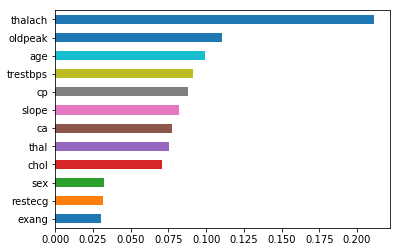

In [50]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=92019)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [51]:
# tuned Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=100, random_state=92019)

Train accuracy: 100.00%
Test accuracy: 82.42%


## Remarks 

In [52]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(max_depth=2, random_state=92019), LogisticRegression(), 
        GaussianNB(), SVC(C=0.05, kernel='linear'), RandomForestClassifier(n_estimators=100, random_state=92019)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [53]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.813187
Decision Trees,0.802198
Logistic Regression,0.824176
Naive Bayes,0.802198
SVM,0.824176
Random Forests,0.824176


Here we can conclude - Random Forests, SVM and Logistic Regression best performing algorithms for this problem. 